In [1]:
import numpy as np
# np.random.seed(1018)
import matplotlib.pyplot as plt
import random as rm
import pandas as pd
from sklearn import preprocessing
data = pd.read_csv('233.txt',sep=' ',header=None)
data_scaler = preprocessing.MinMaxScaler(feature_range=(0.001,1))
dataset = data_scaler.fit_transform(np.array(data[1][:]).reshape(-1, 1))
plt.plot(dataset[5000:8100])
plt.show()

<Figure size 640x480 with 1 Axes>

In [2]:
dataset = (dataset[5000:8100]*1000).astype(np.int32)
enconder = preprocessing.OneHotEncoder()
enconder.fit(np.arange(1,1001).reshape(-1,1))
# enconder.fit(dataset)
dataset = enconder.transform(dataset).toarray()

In [3]:
dataset.shape

(3100, 1000)

In [4]:
def GetBatch(data,TIME_STEPS):
    data_X = []
    data_y = []
    for INDEX in range(0,len(data)-TIME_STEPS):
        X_step = data[INDEX:INDEX+TIME_STEPS,:]
        y_step = data [INDEX+TIME_STEPS,:]
        data_X.append(X_step)
        data_y.append(y_step)
    return np.array(data_X),np.array(data_y)

In [5]:
TIME_STEPS = 32
BATCH_SIZE = 128

In [6]:
testX,testy = GetBatch(dataset,TIME_STEPS)

In [7]:
predictions = []
for num in testX[0].squeeze():
    predictions.append(num.tolist())

In [8]:
len(predictions[1])

1000

In [9]:
from keras.models import load_model
model = load_model('233_concentrate.h5')

C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [10]:
def prediction(batch_size,time_step,X_test):
    X_test = X_test.reshape(-1,X_test.shape[0],X_test.shape[1])
    y_pred = model.predict(X_test, batch_size=batch_size)
    return y_pred

In [11]:
for i in range(1,3000):
    y_pred = prediction(BATCH_SIZE,TIME_STEPS,np.array(predictions[-TIME_STEPS::]))
    predictions.append(y_pred.squeeze().tolist())

In [12]:
sequence = np.argmax(predictions, axis=1)/1000

In [13]:
sequence.shape

(3031,)

In [14]:
testy.shape

(3068, 1000)

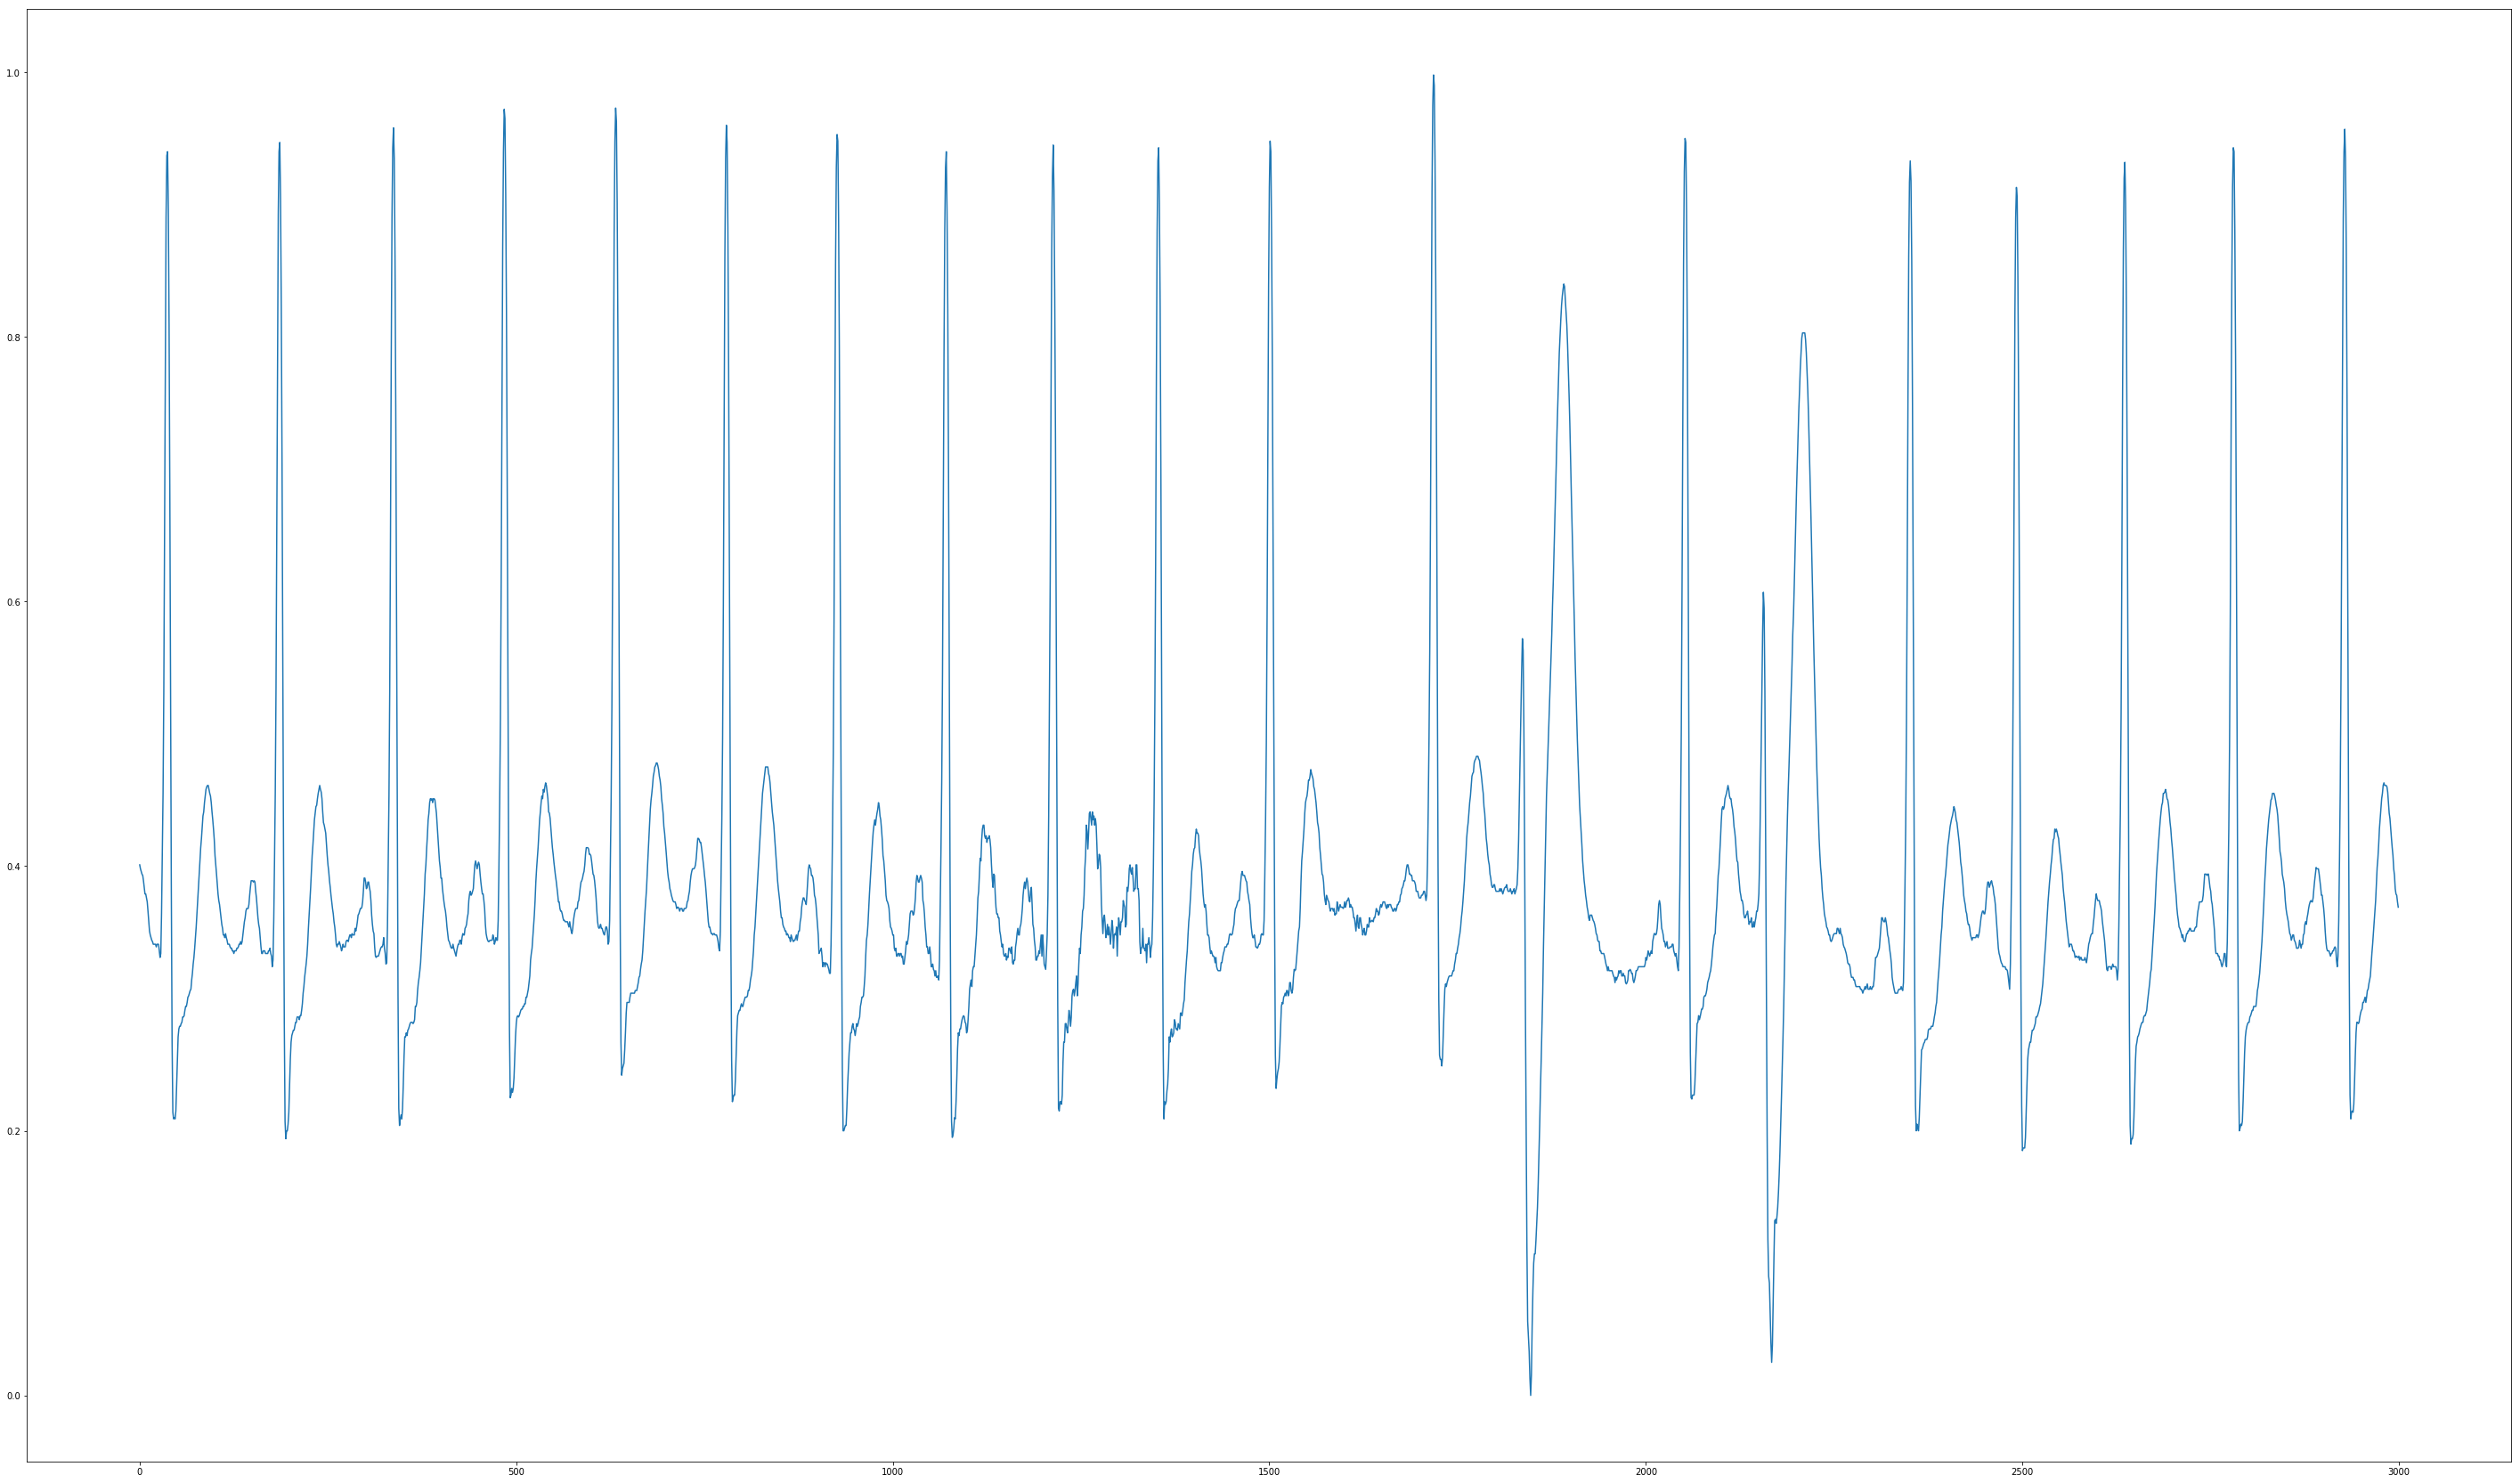

In [15]:
plt.figure(figsize=(50,30))
# plt.plot(sequence[31:-31])
plt.plot(np.argmax(testy[:3000],axis=1)/1000)
plt.show()

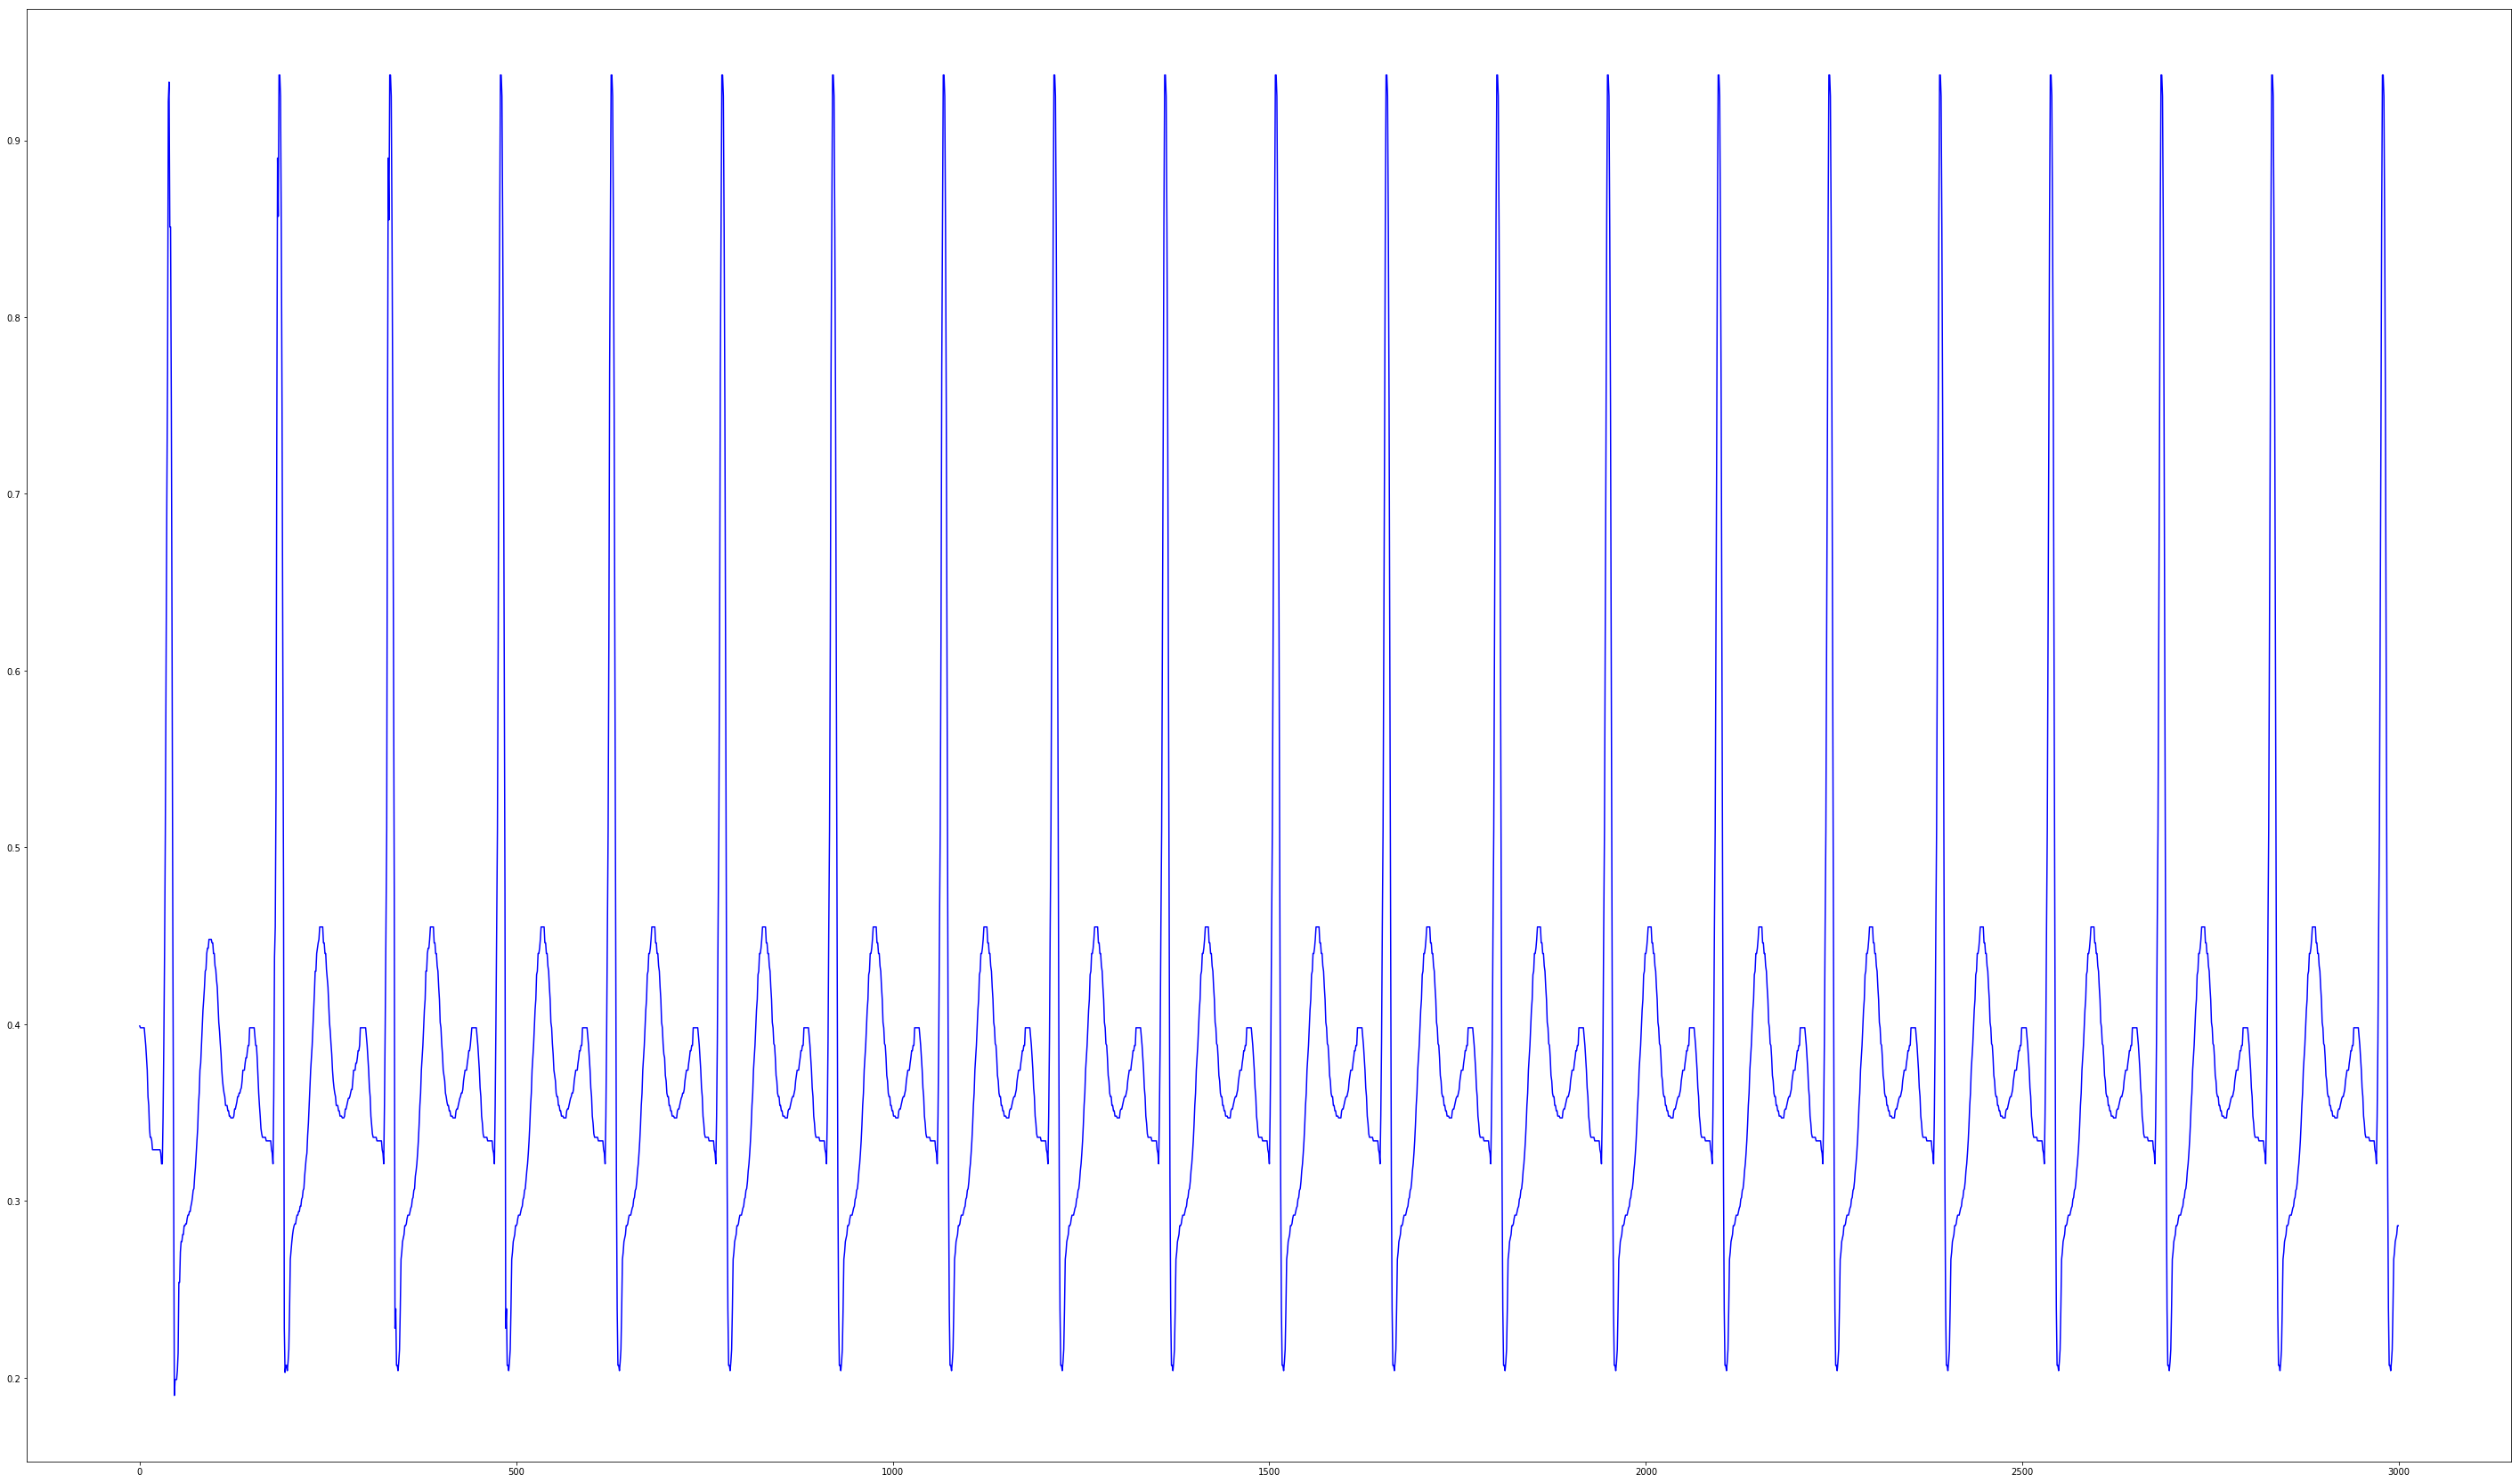

In [16]:
plt.figure(figsize=(50,30))
plt.plot(sequence[31::],'b')
plt.show()

In [17]:
def DTW(xs,ys):
    ys_reverse = ys[-1::-1]
    d = np.zeros([len(ys),len(xs)])
    for i in range(len(xs)):
        d[:,i] = (xs[i] -ys_reverse)**2
    g = np.zeros([len(ys_reverse),len(xs)])
    g[-1,0] = 2*d[-1,0]
    for i in range(1,g.shape[1]):
        g[-1,i] = g[-1,i-1]+d[-1,i]
    for i in range(0,g.shape[0]-1)[-1::-1]:
        g[i,0] = g[i+1,0]+d[i,0]
    for j in range(1,g.shape[1]):
        for i in range(0,g.shape[0]-1)[-1::-1]:
            g[i,j] = min(g[i+1,j]+d[i,j],g[i,j-1]+d[i,j],g[i+1,j-1]+2*d[i,j])
    return g[0,-1]

In [18]:
labels = np.argmax(testy[:3000],axis=1)/1000
print(len(labels))
sequence = sequence[31::]
len(sequence)

3000


3000

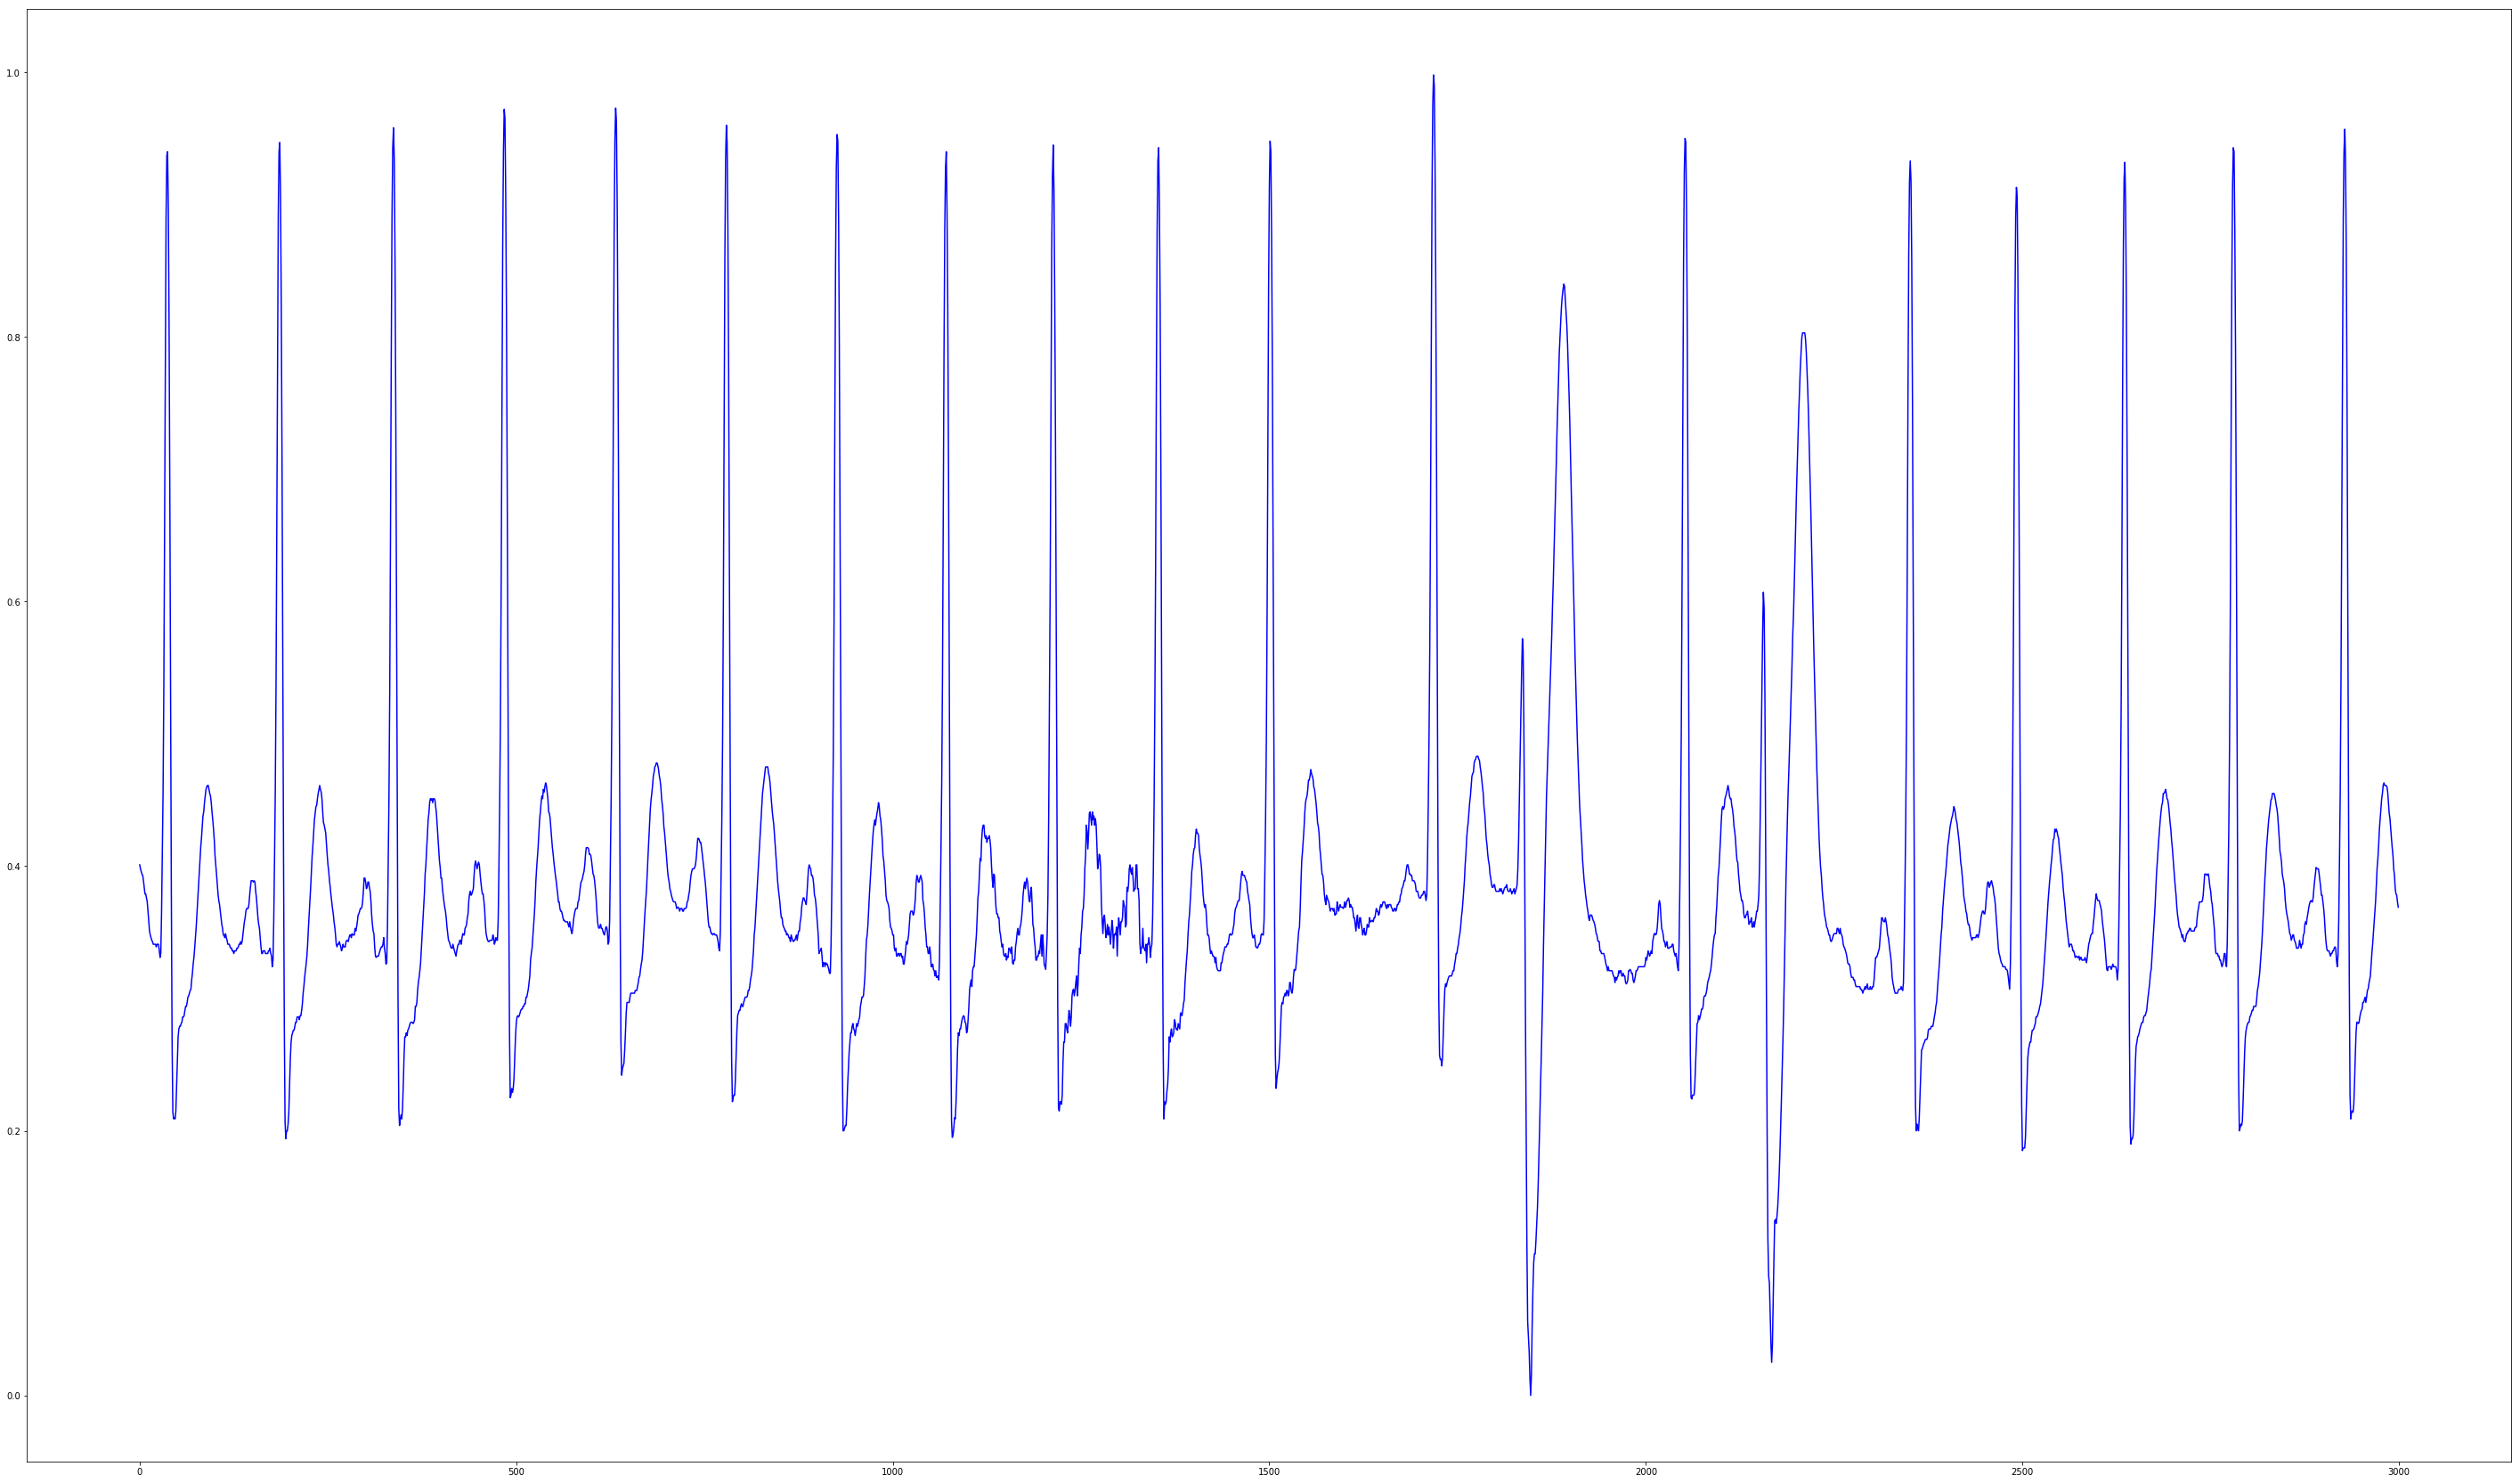

In [19]:
plt.figure(figsize=(50,30))
plt.plot(labels,'b')
plt.show()

In [20]:
DTWs = []
labels = np.argmax(testy[:3000],axis=1)/1000
for i in range(0,len(labels),300):
    DTW_distance = DTW(sequence[i:i+300],labels[i:i+300])
    DTWs.append(DTW_distance)

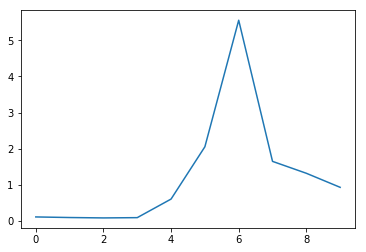

In [21]:
plt.plot(DTWs)
plt.show()

In [22]:
print(DTWs)

[0.10504999999999978, 0.088657, 0.07787699999999995, 0.0855029999999999, 0.6007559999999998, 2.0508499999999916, 5.558784000000004, 1.6456679999999957, 1.315587000000002, 0.9259019999999996]


In [23]:
DTWs = []
labels = np.argmax(testy[:3000],axis=1)/1000
for i in range(0,len(labels),200):
    DTW_distance = DTW(sequence[i:i+200],labels[i:i+200])
    DTWs.append(DTW_distance)

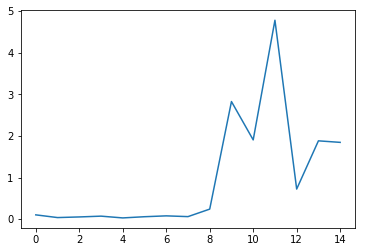

In [24]:
plt.plot(DTWs)
plt.show()

In [25]:
DTWs = []
labels = np.argmax(testy[:3000],axis=1)/1000
for i in range(0,len(labels),100):
    DTW_distance = DTW(sequence[i:i+100],labels[i:i+100])
    DTWs.append(DTW_distance)

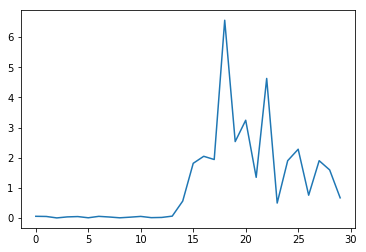

In [26]:
plt.plot(DTWs)
plt.show()

In [178]:
DTWs = []
labels = np.argmax(testy[:3000],axis=1)/1000
for i in range(0,len(labels),150):
    DTW_distance = DTW(sequence[i:i+150],labels[i:i+150])
    DTWs.append(DTW_distance)

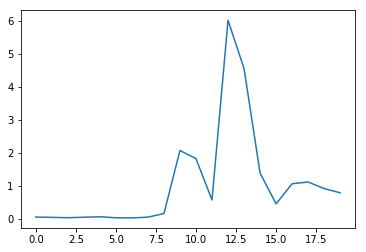

In [179]:
plt.plot(DTWs)
plt.show()

In [183]:
DTWs

[0.05717299999999995,
 0.04795800000000002,
 0.037565,
 0.05287099999999997,
 0.06526900000000001,
 0.03643700000000003,
 0.031326,
 0.054176999999999954,
 0.16297699999999998,
 2.069580999999994,
 1.823767999999995,
 0.5748329999999995,
 6.008304000000008,
 4.547493999999999,
 1.3887039999999997,
 0.4569,
 1.0645960000000003,
 1.116851999999999,
 0.9183529999999993,
 0.7909800000000005]

In [29]:
DTWs = []
labels = np.argmax(testy[:3000],axis=1)/1000
for i in range(0,len(labels),250):
    DTW_distance = DTW(sequence[i:i+250],labels[i:i+250])
    DTWs.append(DTW_distance)

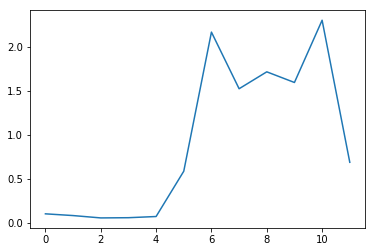

In [30]:
plt.plot(DTWs)
plt.show()

In [31]:
DTWs = []
labels = np.argmax(testy[:3000],axis=1)/1000
for i in range(0,len(labels),350):
    DTW_distance = DTW(sequence[i:i+350],labels[i:i+350])
    DTWs.append(DTW_distance)

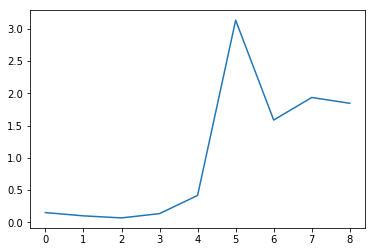

In [32]:
plt.plot(DTWs)
plt.show()

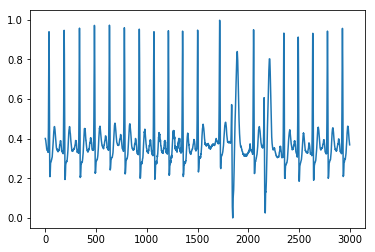

In [168]:
plt.plot(labels)
plt.show()

In [184]:
Darray = np.array(DTWs).repeat(150)

In [309]:
DTWs = []
labels = np.argmax(testy[:3000],axis=1)/1000
for i in range(0,len(labels),150):
    DTW_distance = DTW(sequence[i:i+150],labels[i:i+150])
    DTWs.append(DTW_distance)

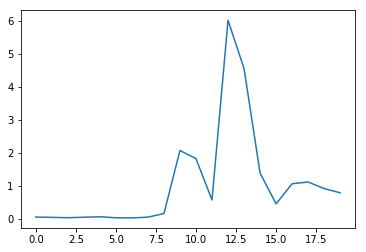

In [310]:
plt.plot(DTWs)
plt.show()

In [302]:
DTWs

[0.05717299999999995,
 0.04795800000000002,
 0.037565,
 0.05287099999999997,
 0.06526900000000001,
 0.03643700000000003,
 0.031326,
 0.054176999999999954,
 0.16297699999999998,
 2.069580999999994,
 1.823767999999995,
 0.5748329999999995,
 6.008304000000008,
 4.547493999999999,
 1.3887039999999997,
 0.4569,
 1.0645960000000003,
 1.116851999999999,
 0.9183529999999993,
 0.7909800000000005]

In [303]:
xs = np.linspace(0,3000,3000)

In [304]:
pos = np.where(np.array(DTWs)>1.2,1,0)

In [305]:
pos

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0])

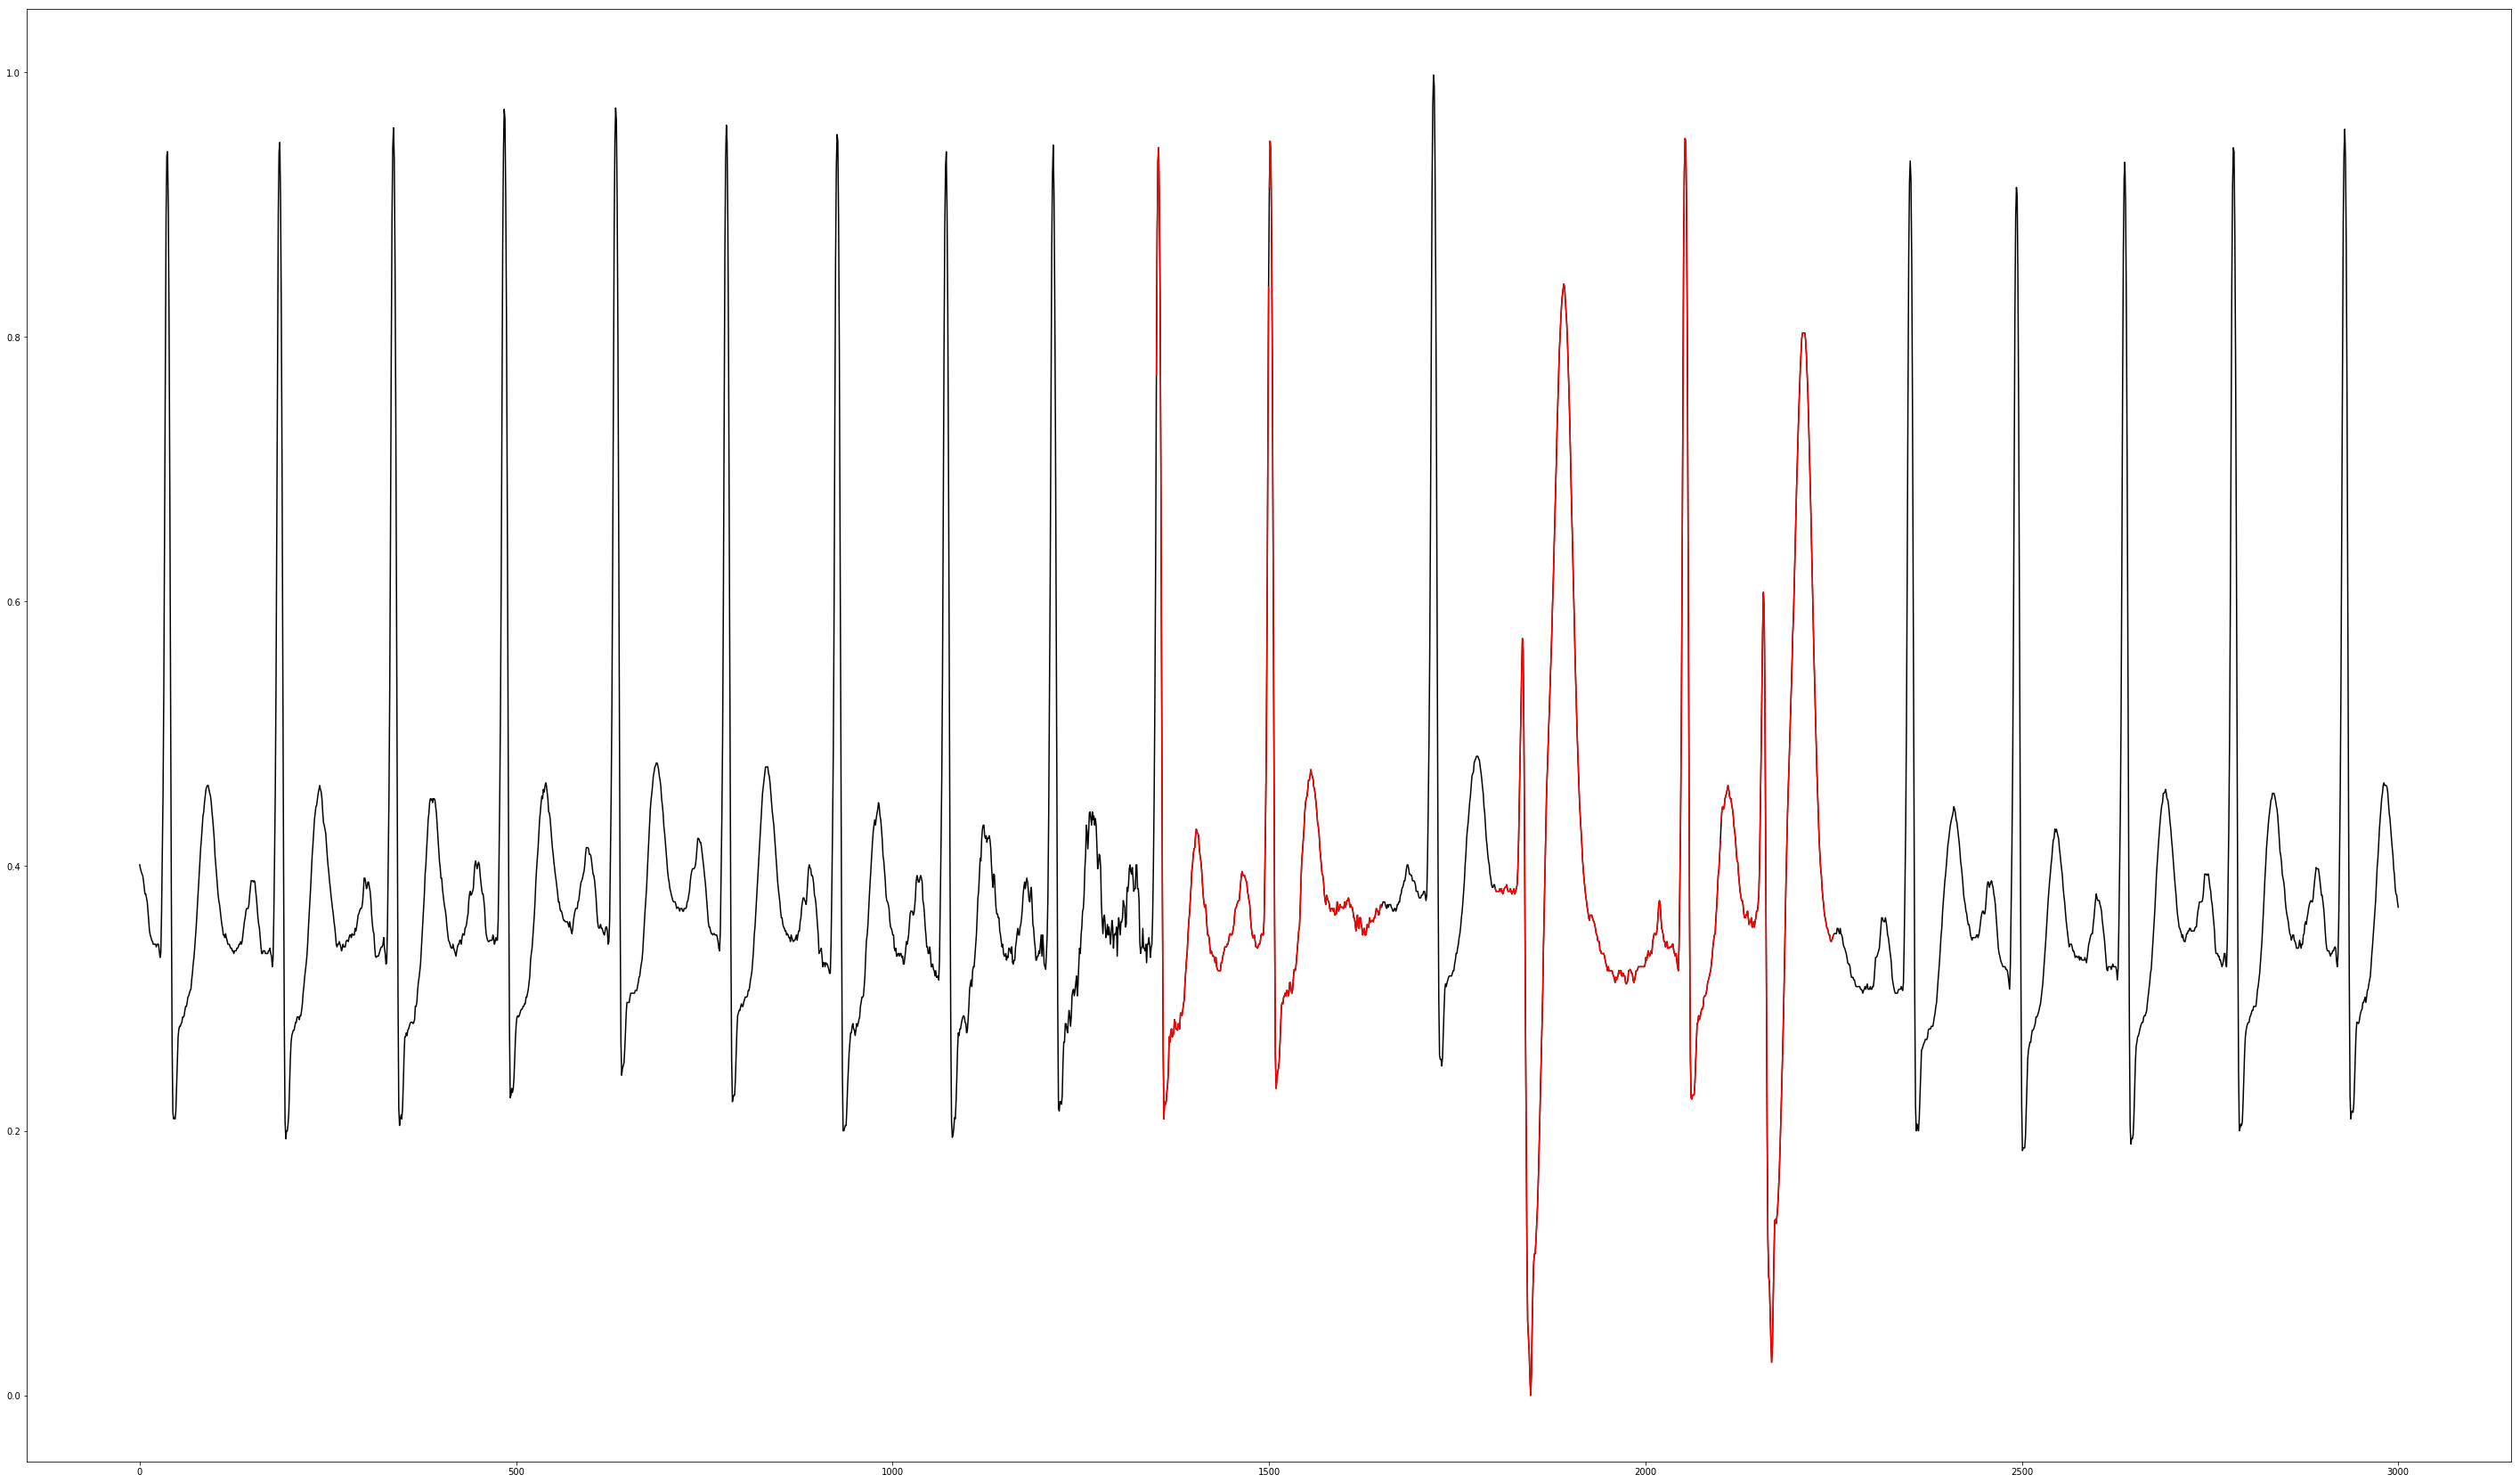

In [306]:
index = 0
plt.figure(figsize=(50,30))
plt.plot(xs,labels,'k')
for i in range(len(pos)):
    if pos[i] ==1:
        plt.plot(xs[index:index+150],labels[index:index+150],'r')
    index+=150
plt.show()

In [2]:
def DTW(xs,ys):
    ys_reverse = ys[-1::-1]
    d = np.zeros([len(ys),len(xs)])
    for i in range(len(xs)):
        d[:,i] = (xs[i] -ys_reverse)**2
    g = np.zeros([len(ys_reverse),len(xs)])
    g[-1,0] = 2*d[-1,0]
    for i in range(1,g.shape[1]):
        g[-1,i] = g[-1,i-1]+d[-1,i]
    for i in range(0,g.shape[0]-1)[-1::-1]:
        g[i,0] = g[i+1,0]+d[i,0]
    for j in range(1,g.shape[1]):
        for i in range(0,g.shape[0]-1)[-1::-1]:
            g[i,j] = min(g[i+1,j]+d[i,j],g[i,j-1]+d[i,j],g[i+1,j-1]+2*d[i,j])
    return g

In [4]:
xs = np.array([1,1,3,7,9])
ys = np.array([1,3,2,1,5])

In [5]:
g = DTW(xs,ys)

In [6]:
g

array([[ 21.,  21.,   9.,  13.,  29.],
       [  5.,   5.,   5.,  41., 105.],
       [  5.,   5.,   1.,  26.,  75.],
       [  4.,   4.,   0.,  16.,  52.],
       [  0.,   0.,   4.,  40., 104.]])